In [20]:
import fbprophet
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
exec(open("~/ai-workflow-capstone/capstone-script.py").read())

Elapsed time: 15.7412 seconds
load time: 0:00:15


In [12]:
td = ts_data.copy()
td = td.drop(['purchases', 'unique_invoices', 'streams', 'total_views'], axis=1)
td['ds'] = td.index
td = td.rename({'revenue': 'y'},axis=1)

In [116]:
td['y'] = td['y'].interpolate(method='time')

In [117]:
td_train, td_test = train_test_split(td, test_size=.3)

In [118]:
td_prophet = fbprophet.Prophet(changepoint_prior_scale=.15)
td_prophet.fit(td_train)
td_forecast = td_prophet.make_future_dataframe(periods=1, freq='D')
td_forecast = td_prophet.predict(td_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
from fbprophet.diagnostics import cross_validation
help(cross_validation)
tmp = cross_validation(td_prophet, '30 days')

INFO:fbprophet:Making 33 forecasts with cutoffs between 2018-03-05 00:00:00 and 2019-06-28 00:00:00


Help on function cross_validation in module fbprophet.diagnostics:

cross_validation(model, horizon, period=None, initial=None)
    Cross-Validation for time series.
    
    Computes forecasts from historical cutoff points. Beginning from
    (end - horizon), works backwards making cutoffs with a spacing of period
    until initial is reached.
    
    When period is equal to the time interval of the data, this is the
    technique described in https://robjhyndman.com/hyndsight/tscv/ .
    
    Parameters
    ----------
    model: Prophet class object. Fitted Prophet model
    horizon: string with pd.Timedelta compatible style, e.g., '5 days',
        '3 hours', '10 seconds'.
    period: string with pd.Timedelta compatible style. Simulated forecast will
        be done at every this period. If not provided, 0.5 * horizon is used.
    initial: string with pd.Timedelta compatible style. The first training
        period will begin here. If not provided, 3 * horizon is used.
    
    Ret

In [125]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(tmp)

In [127]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,3.996978e+07,6322.165598,3697.665094,0.554081,0.400824,0.924837
1,5 days,4.244864e+07,6515.262358,3899.705985,0.547146,0.336957,0.894706
2,6 days,2.640215e+07,5138.302149,3506.720756,0.576627,0.389265,0.909443
3,7 days,6.742651e+07,8211.364773,4169.288568,0.543105,0.406011,0.915601
4,8 days,6.621176e+07,8137.060651,4149.091139,0.514748,0.397117,0.917112
5,9 days,5.836231e+07,7639.523065,4276.953750,0.626314,0.472056,0.914706
6,10 days,2.810362e+07,5301.284870,3892.940381,0.663560,0.550350,0.900588
7,11 days,5.914781e+07,7690.761248,4663.414772,0.732089,0.564330,0.882353
8,12 days,7.463830e+07,8639.345851,5096.632325,0.718166,0.544661,0.871658
9,13 days,9.543882e+07,9769.279254,5781.394706,0.783772,0.506588,0.856138


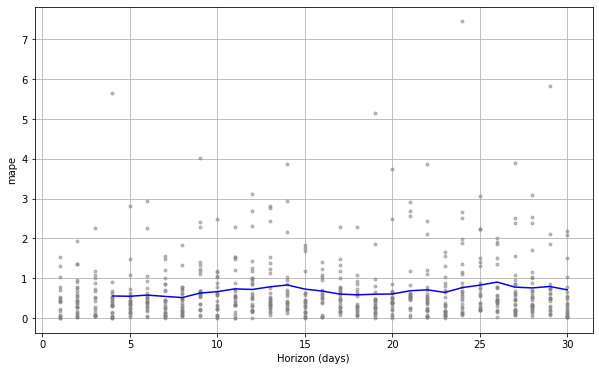

In [129]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(tmp, metric='mape')

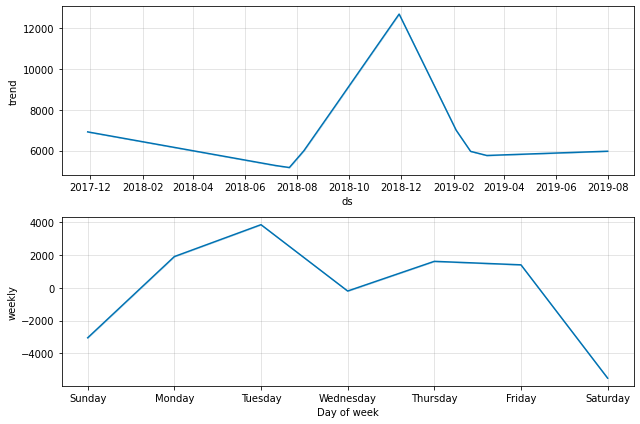

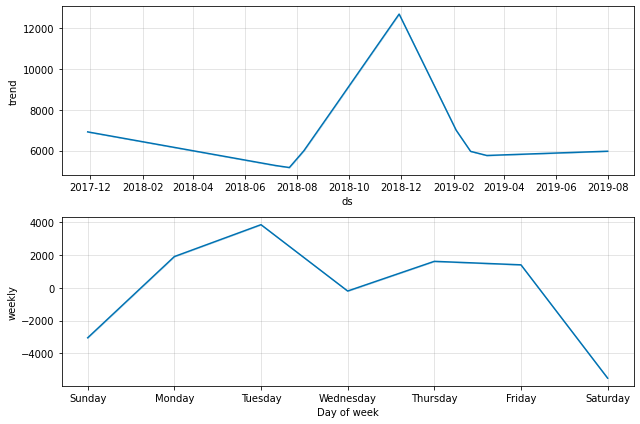

In [46]:
td_prophet.plot_components(td_forecast)

In [30]:
td_forecast[['ds', 'yhat']]

,ds,yhat
0,2017-11-28,10772.476640
1,2017-11-29,6713.573935
2,2017-11-30,8518.563225
3,2017-12-01,8298.242354
4,2017-12-02,1372.514200
...,...,...
607,2019-07-28,2913.591691
608,2019-07-29,7873.402757
609,2019-07-30,9822.471273
610,2019-07-31,5772.518037


In [35]:
import statsmodels.api as sm
import itertools

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [62]:
results = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(td['y'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results.append((mod.fit(), param, param_seasonal))
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

In [63]:
results[np.argmin([r[0].aic for r in results])]

(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x185798370>,
 (1, 0, 1),
 (0, 1, 1, 12))

In [65]:
mod = sm.tsa.statespace.SARIMAX(td['y'],
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

result = mod.fit()

print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8892      0.101      8.802      0.000       0.691       1.087
ma.L1         -0.8056      0.143     -5.640      0.000      -1.086      -0.526
ma.S.L12      -0.9603      0.044    -21.744      0.000      -1.047      -0.874
sigma2      2.584e+08   2.92e-10   8.86e+17      0.000    2.58e+08    2.58e+08


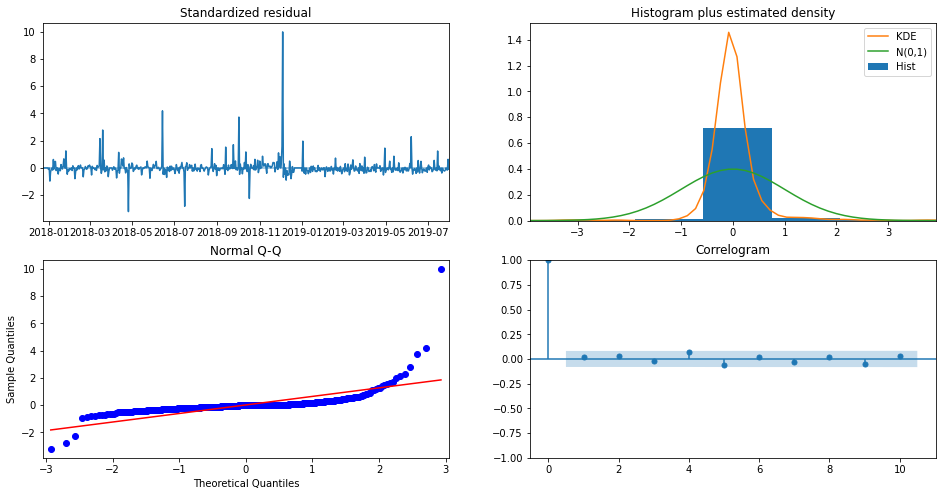

In [67]:
import matplotlib.pyplot as plt
result.plot_diagnostics(figsize=(16,8))
plt.show()

In [76]:
help(td['y'].interpolate)

Help on method interpolate in module pandas.core.generic:

interpolate(method: str = 'linear', axis: Union[str, int] = 0, limit: Union[int, NoneType] = None, inplace: bool = False, limit_direction: Union[str, NoneType] = None, limit_area: Union[str, NoneType] = None, downcast: Union[str, NoneType] = None, **kwargs) -> Union[~FrameOrSeries, NoneType] method of pandas.core.series.Series instance
    Please note that only ``method='linear'`` is supported for
    DataFrame/Series with a MultiIndex.
    
    Parameters
    ----------
    method : str, default 'linear'
        Interpolation technique to use. One of:
    
        * 'linear': Ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
        * 'time': Works on daily and higher resolution data to interpolate
          given length of interval.
        * 'index', 'values': use the actual numerical values of the index.
        * 'pad': Fill in NaNs using existing values.


<AxesSubplot:xlabel='date'>

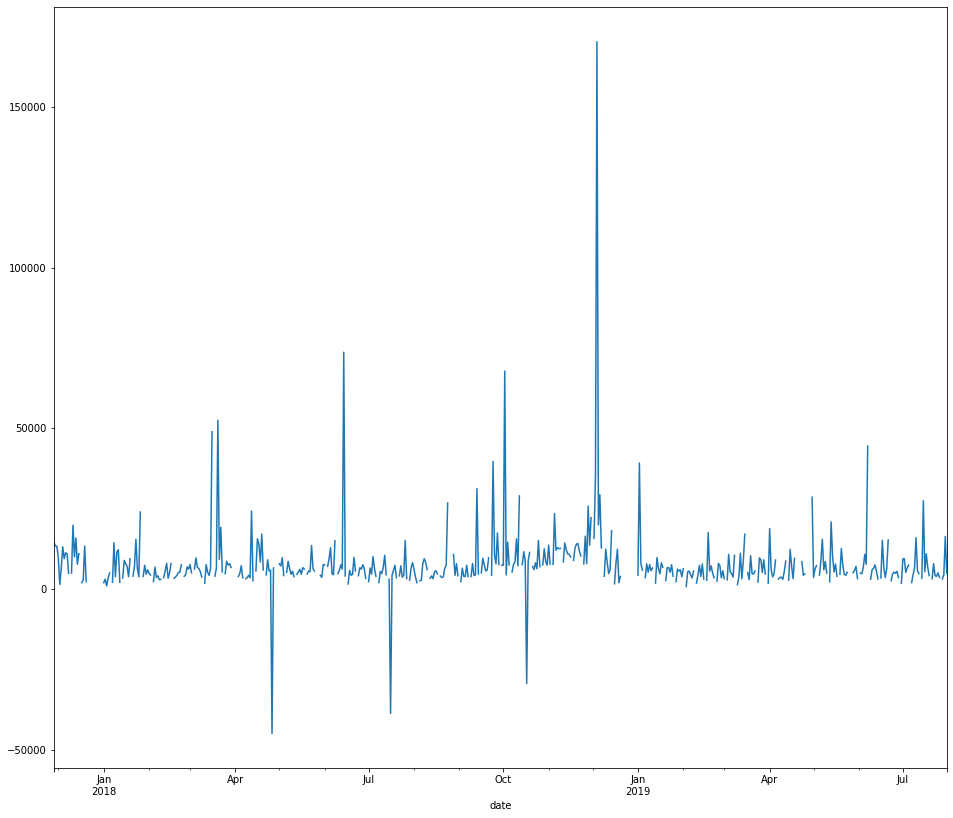

In [81]:
td['y'].plot(figsize=(16,14))

<AxesSubplot:xlabel='date'>

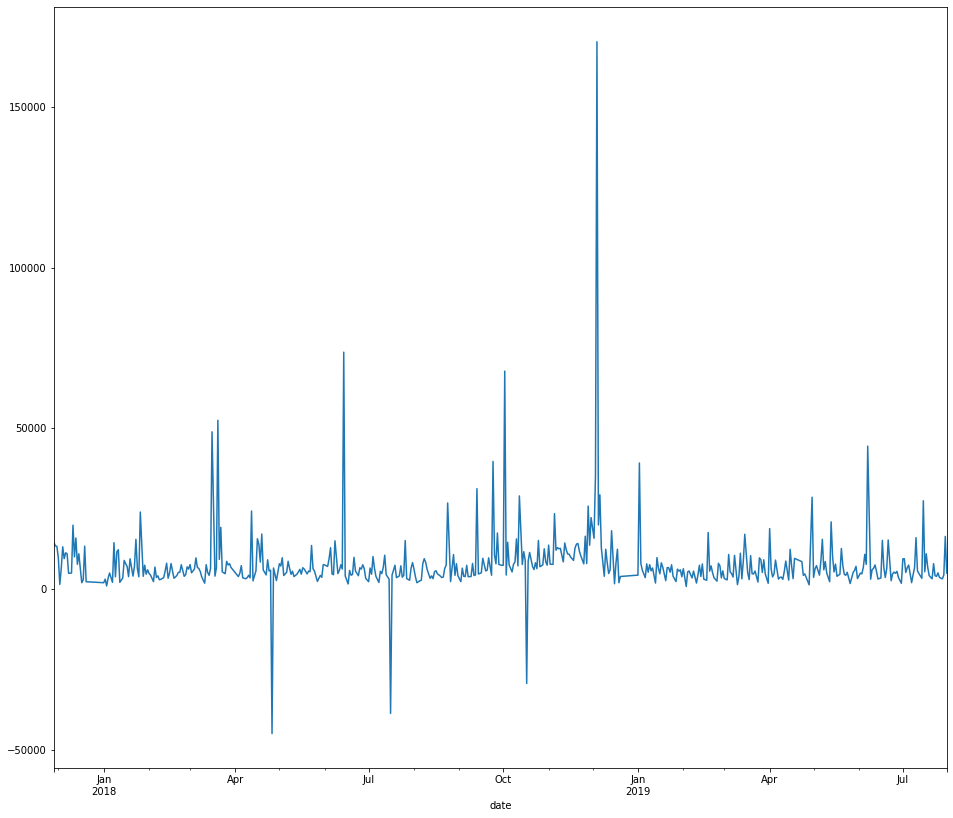

In [86]:
td['y'].interpolate(method='from_derivatives').plot(figsize=(16,14))

In [105]:
monthly = data.groupby(['year','month']).agg({'price':'mean'})

In [106]:
monthly['last30'] = monthly['price'].shift(1)
monthly = monthly.dropna()
monthly['diff'] = monthly['last30'] - monthly['price']

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year,month'>

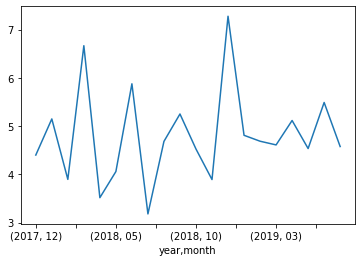

In [107]:
monthly['price'].plot()

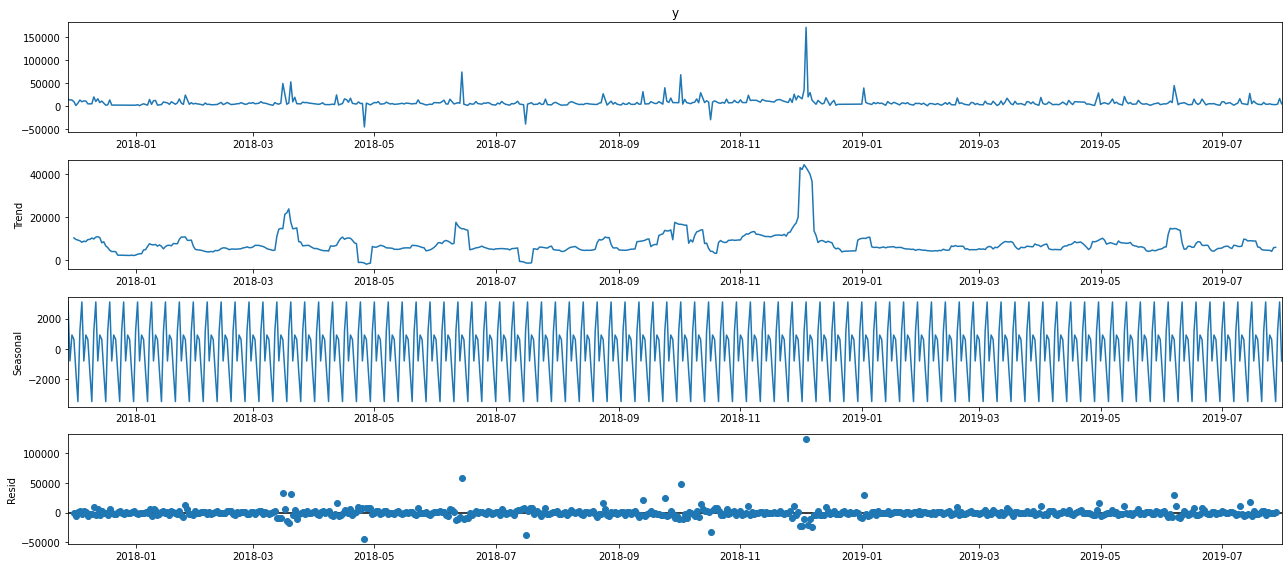

In [113]:
y = td['y'].interpolate(method='time')
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8